In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [54]:
bos.shape

(506, 13)

summary of the boston dataset

In [55]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


check for the missing values

In [56]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

No missing values are present in the dataset

Get the feature names from boston dataset and rename with those in dataset

In [57]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


look for target column 

In [60]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

The feature 'MEDEV' is renamed as 'PRICE' which will be served as target 

In [61]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Summarize the central tendency, dispersion and shape of a dataset’s distribution,

In [62]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Exploratory data analysis

In [63]:
import seaborn as sns

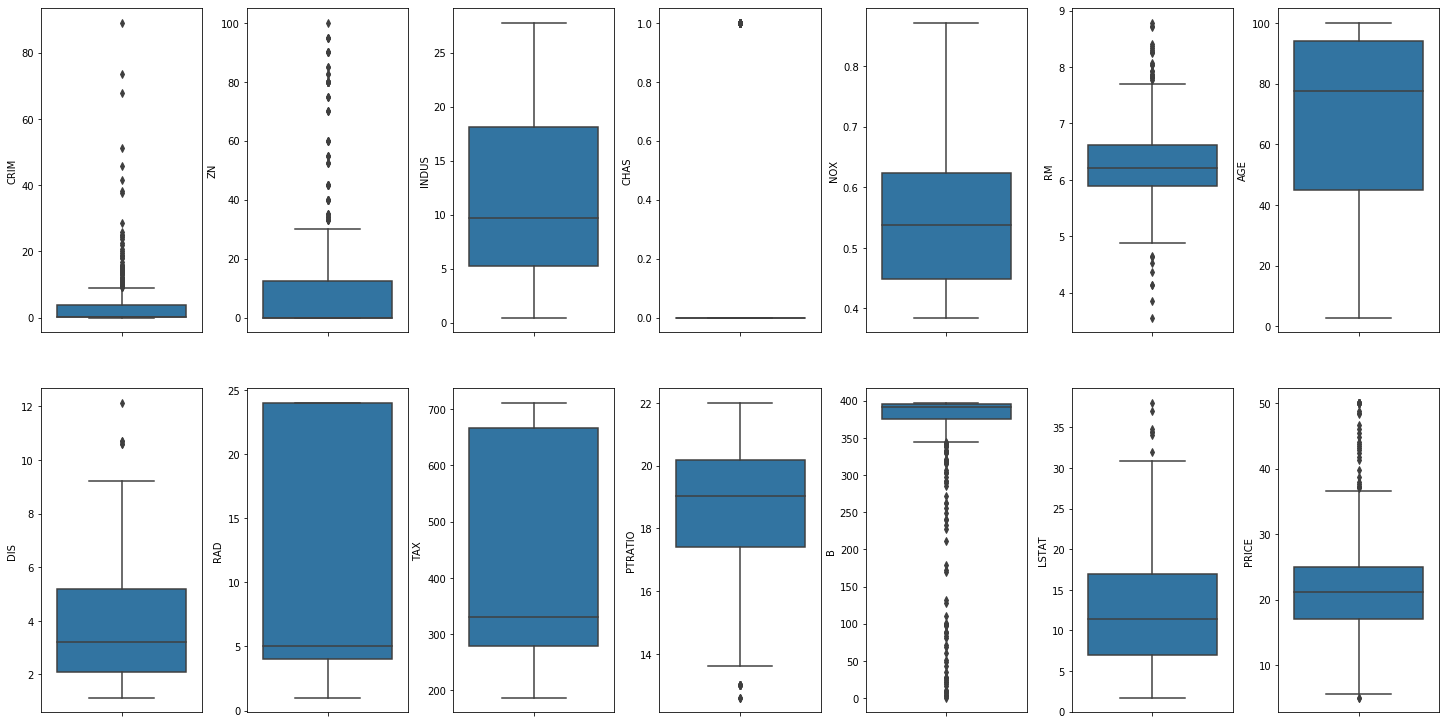

In [79]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for k,v in bos.items():
    sns.boxplot(y=k, data=bos, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Analysis: features such as CRIM,ZN,RM,CHAS,DIS,B,PTRATIO,LSTAT,PRICE have the outliers. Let's see the percentage of outliers

In [116]:
for key,val in bos.items():
    q1 = val.quantile(0.25)
    q3 = val.quantile(0.75)
    irq = q3 - q1
    v_col = val[(val <= q1 - 1.5 * irq) | (val >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(bos)[0]
    print("Column %s outliers = %.2f%%" % (key, perc))

Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column PRICE outliers = 4.49%


In [117]:
#Let's remove PRICE outliers (PRICE = 50.0)
bos = bos[~(bos['PRICE'] >= 50.0)]
bos.shape

(490, 14)

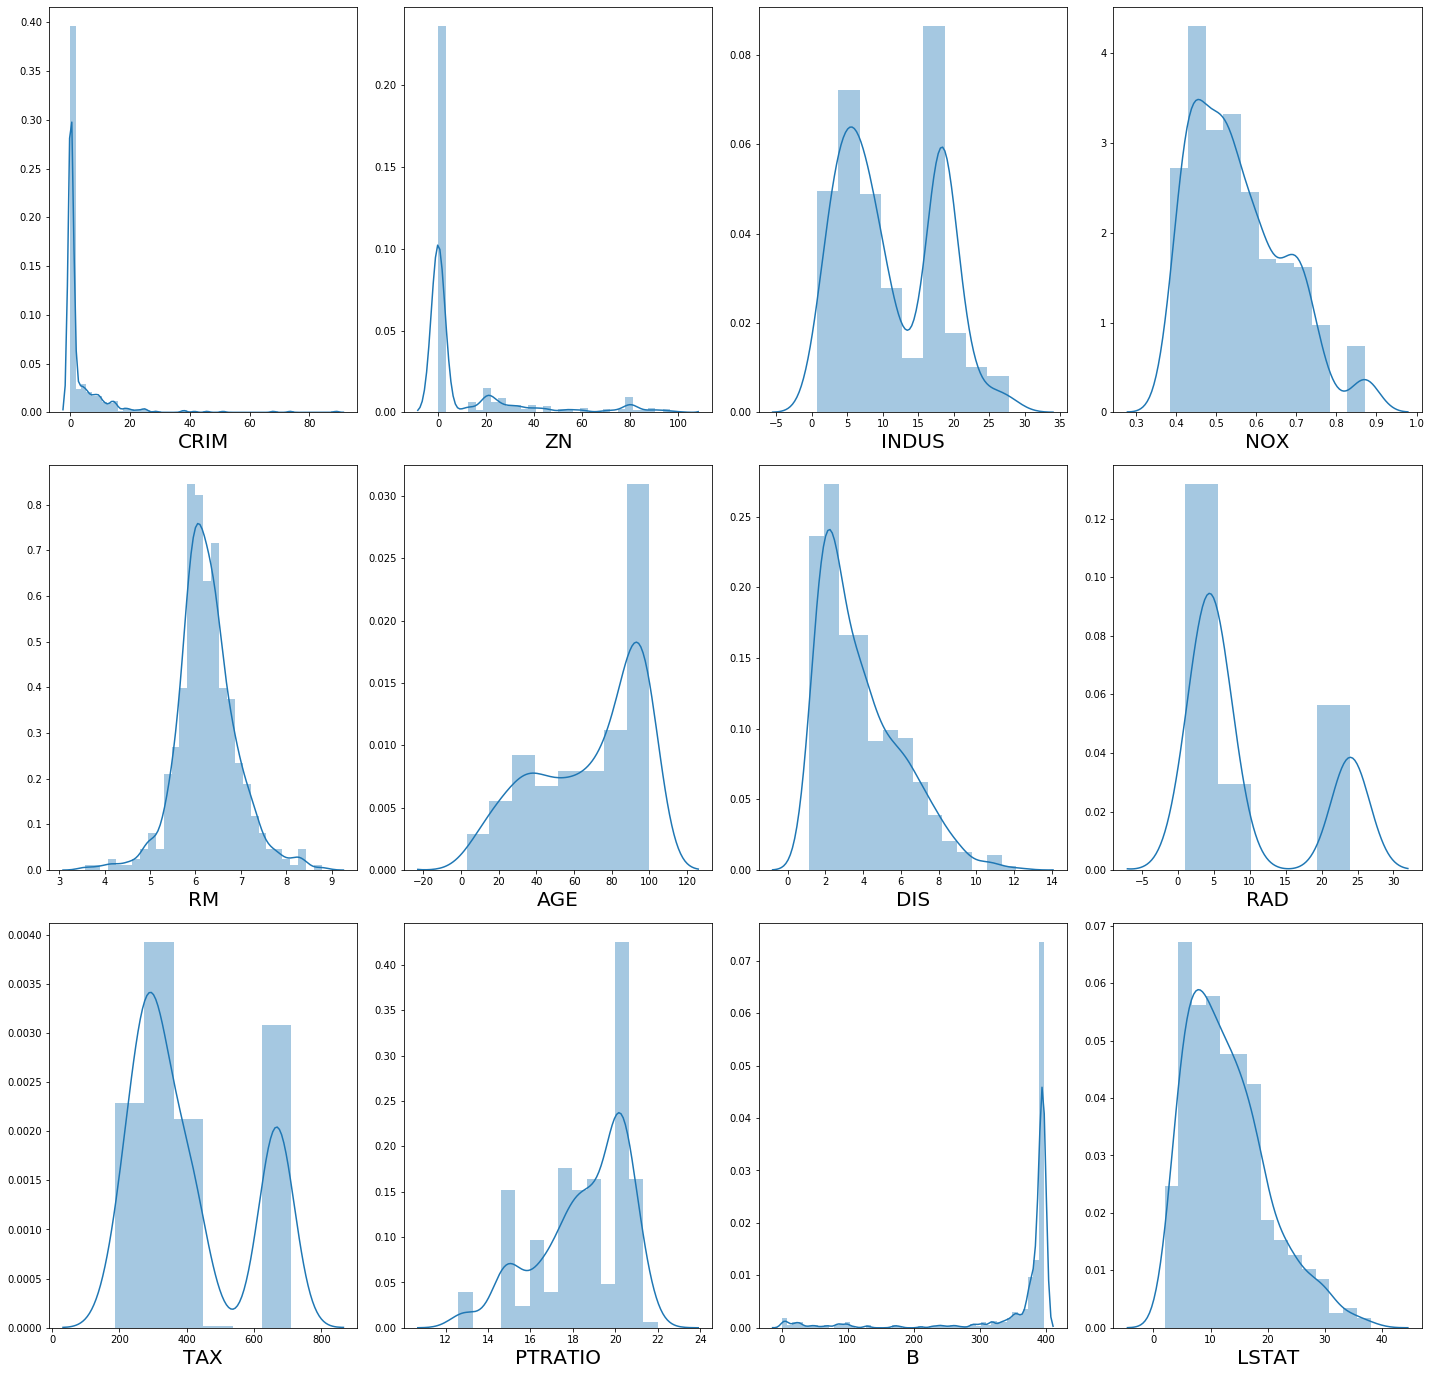

In [131]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
column_cust = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
for column in column_cust:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).


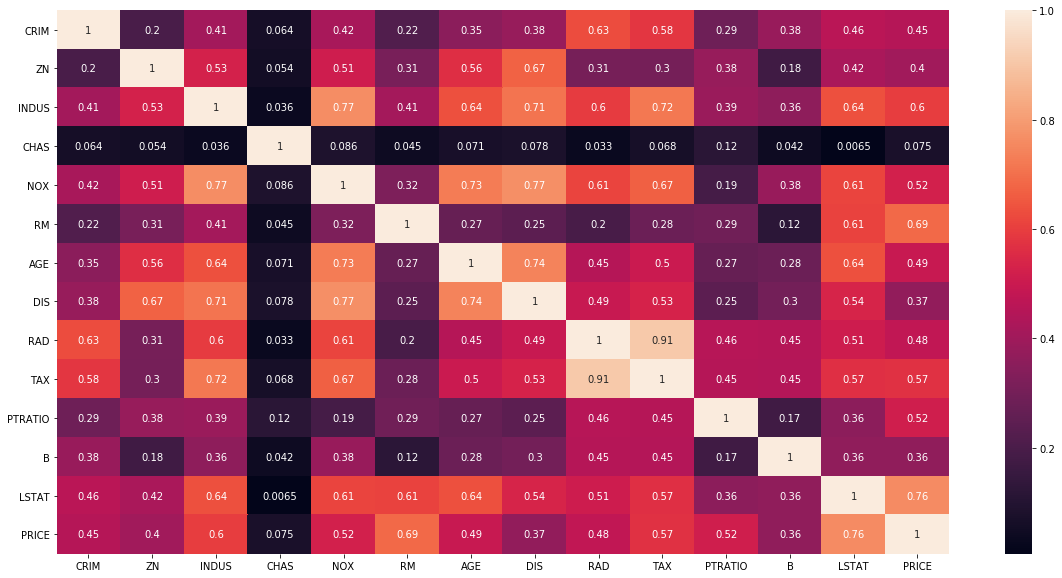

In [165]:
plt.figure(figsize=(20, 10))
sns.heatmap(bos.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRATIO has a correlation score above 0.5 with PRICE which is a good indication of using as predictors. Let's plot these columns against PRICE.

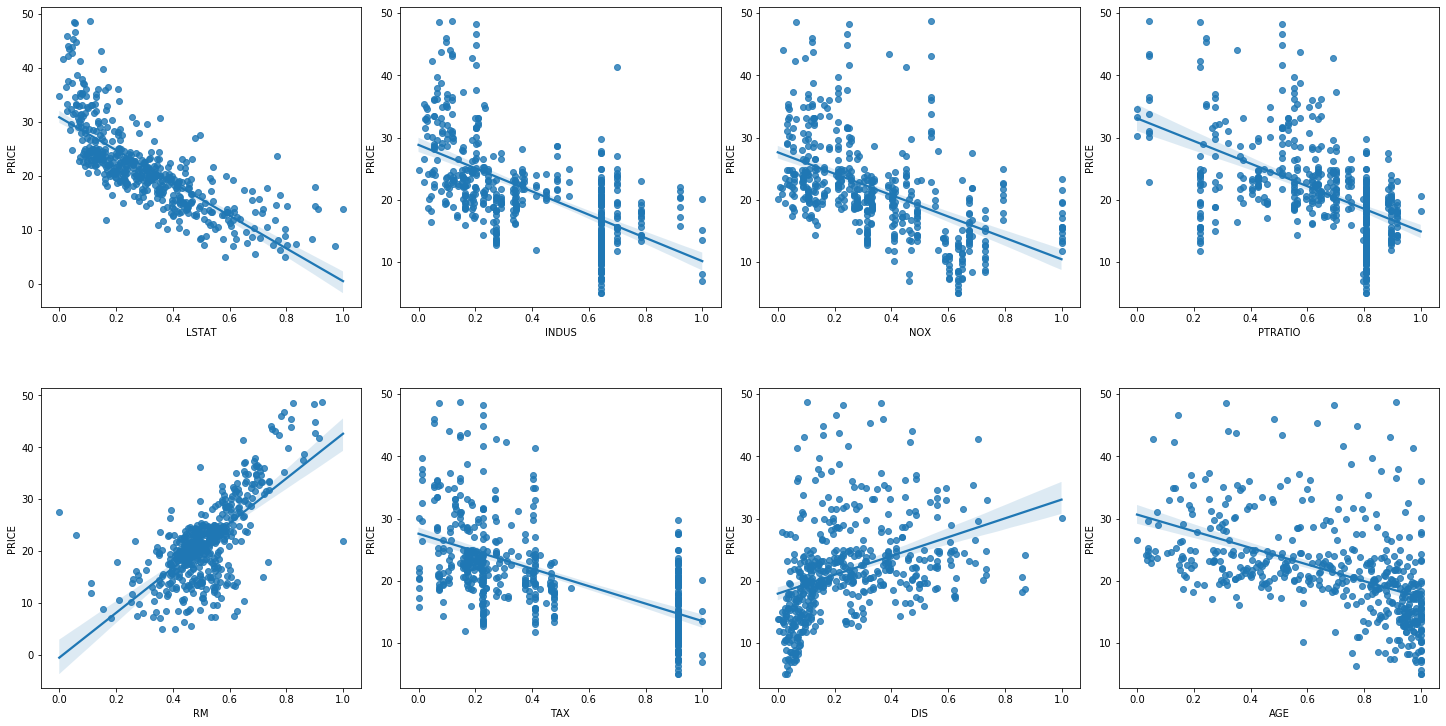

In [167]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against PRICE
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = bos.loc[:,column_sels]
y = bos['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [168]:
#Let's try to remove the skewness of the data trough log transformation.
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])
        

In [164]:
#after log transformation
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675
1,0.181441,0.210621,0.159428,0.440312,0.547998,0.099811,0.299010,0.578128
2,0.055397,0.210621,0.159428,0.440312,0.694386,0.099811,0.299010,0.469617
3,0.026325,0.051960,0.139941,0.500130,0.658555,0.064658,0.370303,0.365901
4,0.089001,0.051960,0.139941,0.500130,0.687105,0.064658,0.370303,0.424170
...,...,...,...,...,...,...,...,...
485,0.193649,0.346737,0.327021,0.638489,0.580954,0.151967,0.115184,0.519848
486,0.180050,0.346737,0.327021,0.638489,0.490324,0.151967,0.099566,0.565337
487,0.096850,0.346737,0.327021,0.638489,0.654340,0.151967,0.089632,0.645695
488,0.117814,0.346737,0.327021,0.638489,0.619467,0.151967,0.107883,0.636473


In [169]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.21080612, -1.39430853, -0.05946546, ..., -0.647109  ,
         0.20220172, -0.0136489 ],
       [-0.50834325, -0.54221818, -0.72650217, ..., -1.06199979,
         0.62012186,  0.4274873 ],
       [-1.38172843, -0.54221818, -0.72650217, ..., -1.06199979,
         0.62012186, -0.15306391],
       ...,
       [-1.09449436,  0.21042594,  0.25182153, ..., -0.81932017,
        -0.81415371,  0.7889817 ],
       [-0.94923006,  0.21042594,  0.25182153, ..., -0.81932017,
        -0.68912668,  0.73964425],
       [-0.71369201,  0.21042594,  0.25182153, ..., -0.81932017,
        -0.62446458,  0.48589253]])

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [171]:
vif

,VIF,Features
0,3.179254,LSTAT
1,3.857279,INDUS
2,5.205145,NOX
3,1.395633,PTRATIO
4,1.816717,RM
5,2.569941,TAX
6,3.941505,DIS
7,3.011985,AGE


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , For NOX, vif is 5.2 so we will consider as predictor.


Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 366)
print('X_train: ',X_train.shape,'\nX_test: ',X_test.shape,'\nY_train: ',y_train.shape,'\nY_test: ',y_test.shape)

X_train:  (392, 8) 
X_test:  (98, 8) 
Y_train:  (392,) 
Y_test:  (98,)


In [175]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
regression.score(X_train,y_train)

0.7603464326708307

In [177]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(X_train,y_train)

0.7553406140321013

Our r2 score is 76.03% and adj r2 is 75.53% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization

In [178]:
regression.score(X_test,y_test)

0.731815125050446

In [179]:
adj_r2(X_test,y_test)

0.7077086194370029

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [180]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [181]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [182]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00018923562395015917

In [183]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.00018923562395015917, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
lasso_reg.score(X_test, y_test)

0.7320482546008921

our r2_score for test data (73.18%) comes same as before using regularization. So, it is fair to say our model did not overfit the data.

In [185]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([3.2980626 , 4.13522122, 5.0516706 , 1.41364015, 3.89963367,
       1.87141707, 5.64637227, 5.30121186, 4.05176895, 1.17337368,
       6.30556966, 4.12124366, 4.22221412, 0.8030828 , 1.82745133,
       7.03269122, 1.21571275, 2.3723404 , 2.84446226, 9.49240753,
       3.59519801, 3.03073885, 4.2518859 , 4.08766083, 0.95847557,
       7.74878236, 0.49420873, 3.55086207, 7.97191889, 4.157937  ,
       7.78771002, 6.64378937, 4.21289802, 1.40658577, 9.06786435,
       2.13614819, 8.9097174 , 7.66156486, 1.66586007, 3.69086998,
       3.19109845, 9.46887346, 9.4678697 , 9.04176327, 8.80980374,
       5.03538728, 2.22015054, 9.7340545 , 0.74940545, 6.16182941]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [186]:
ridgecv.alpha_

0.49420873235103024

In [187]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.49420873235103024, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [188]:
ridge_model.score(X_test, y_test)

0.7320631558772079

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [189]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [190]:
elasticCV.alpha_

0.006932951787994209

In [192]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.006932951787994209, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [193]:
elasticnet_reg.score(X_test, y_test)

0.7317928903575752

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our model has been well trained over the training data and there is no overfitting.

In [194]:
predictions = regression.predict(X_test)

In [195]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1172484807418271
MSE: 0.026613978314672042
RMSE: 0.16313791194775065


Text(0, 0.5, 'Predicted Y')

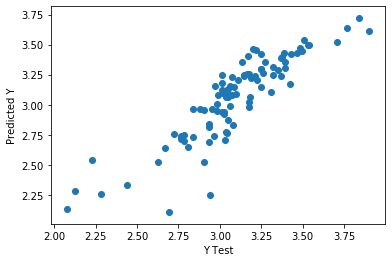

In [196]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

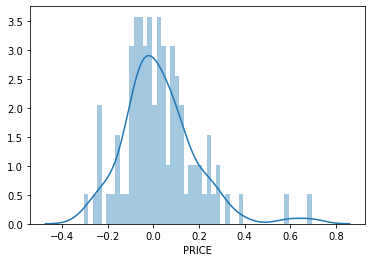

In [197]:
sns.distplot((y_test-predictions),bins=50);

As more normal distribution, better it is.